# Database

## First

Retrieve IBOV's data. From five years to now.

## Second

Add technical features: RSI, Bollinger Bands, STOCH, Williams %R, ROC, SMA, EMA, CCI, OBV, MACD, STOCHRSI.


# First

In [1]:
import pandas as pd
from yahooquery import Ticker

ticker = "BOVA11.SA"
stock = Ticker(ticker)
start='2015-12-01'
end='2021-11-29'

df = stock.history(start=start, end = end)

In [2]:
df = df.xs(ticker)

<AxesSubplot:title={'center':'Line plot of BOVA11 ETF'}, xlabel='date'>

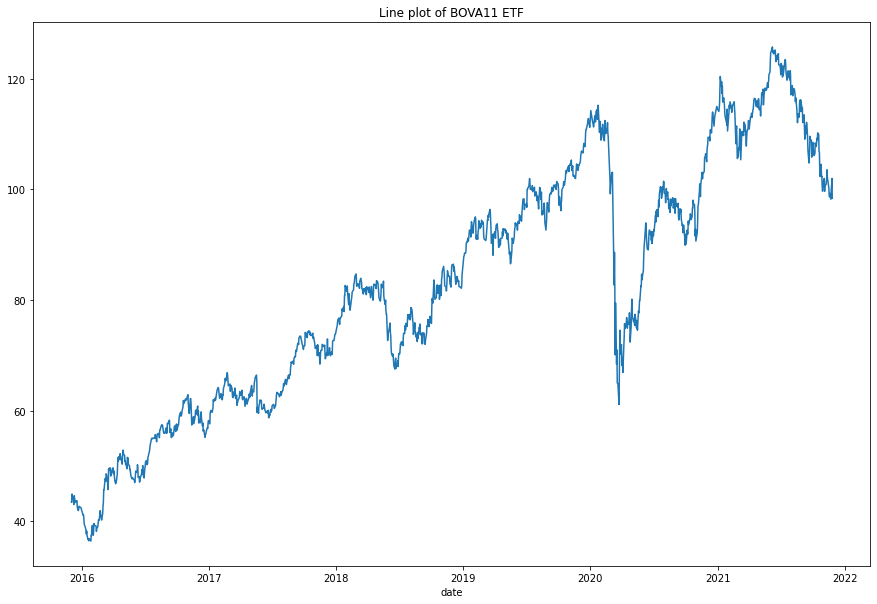

In [27]:
df.close.plot(kind="line", title = "Line plot of BOVA11 ETF", figsize=(15, 10))

# Second

## RSI

In [4]:
delta = df["close"].diff()
ups = delta.clip(lower=0) #positive variations
down = -1*delta.clip(upper=0) #negative variations
sma_up = ups.rolling(window=14).mean()
sma_down = down.rolling(window=14).mean()
rs = sma_up/sma_down
df['rsi'] = 100 - (100/(1+rs))

<AxesSubplot:title={'center':"Line plot of brazilian IBOV index' RSI"}, xlabel='date'>

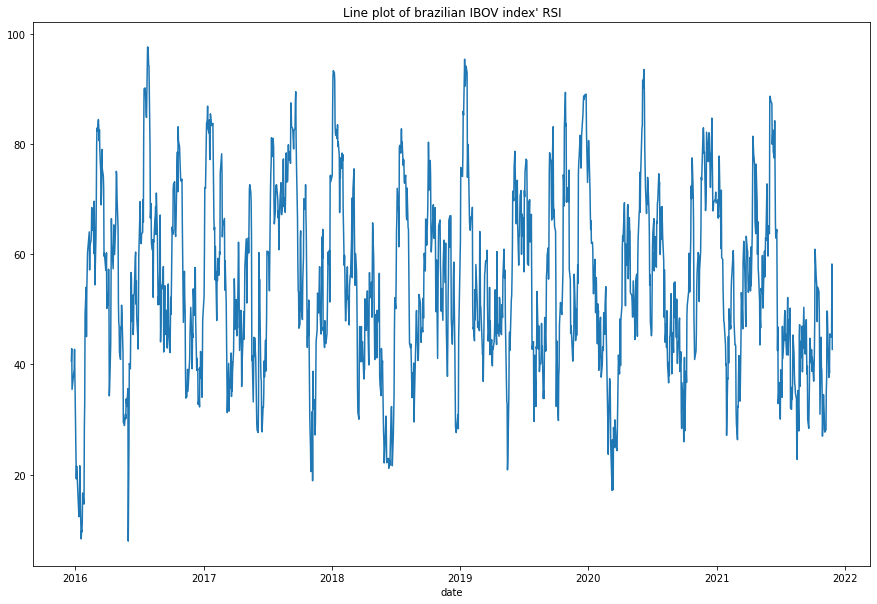

In [5]:
df.rsi.plot(kind="line", title = "Line plot of brazilian IBOV index' RSI", figsize=(15, 10))

## Bollinger Bands

In [6]:
tp = (df['close'] + df['low'] + df['high'])/3
stddev = tp.rolling(20).std(ddof=0)
df['BOLM'] = tp.rolling(20).mean()
df['BOLU'] = df['BOLM'] + 2*stddev
df['BOLD'] = df['BOLM'] - 2*stddev

In [7]:
df[["BOLM", "BOLU", "BOLD"]]

,BOLM,BOLU,BOLD
date,,,
2015-12-01,NaN,NaN,NaN
2015-12-02,NaN,NaN,NaN
2015-12-03,NaN,NaN,NaN
2015-12-04,NaN,NaN,NaN
2015-12-07,NaN,NaN,NaN
...,...,...,...
2021-11-22,101.312500,104.219112,98.405887
2021-11-23,101.194166,104.224619,98.163714
2021-11-24,100.987333,103.703679,98.270987


## STOCH

In [8]:
high_14 = df['high'].rolling(14).max()
low_14 = df['low'].rolling(14).min()
pctK = (df['close'] - low_14)*100/(high_14 - low_14)
df['STOCH'] = pctK.rolling(3).mean()

In [9]:
df["STOCH"]

date
2015-12-01          NaN
2015-12-02          NaN
2015-12-03          NaN
2015-12-04          NaN
2015-12-07          NaN
                ...    
2021-11-22     9.119485
2021-11-23    17.121250
2021-11-24    25.196846
2021-11-25    45.367603
2021-11-26    38.509300
Name: STOCH, Length: 1489, dtype: float64

## Williams %R

In [10]:
high14 = df['high'].rolling(14).max() 
low14 = df['low'].rolling(14).min()
df['%R'] = -100 * ((high14 - df['close']) / (high14 - low14))

In [11]:
df['%R']

date
2015-12-01          NaN
2015-12-02          NaN
2015-12-03          NaN
2015-12-04          NaN
2015-12-07          NaN
                ...    
2021-11-22   -98.427697
2021-11-23   -67.975803
2021-11-24   -58.005963
2021-11-25   -37.915424
2021-11-26   -88.550714
Name: %R, Length: 1489, dtype: float64

## ROC

In [12]:
cn = df['close'].shift(14)
df['ROC'] = ((df['close'] - cn)/cn)*100

In [13]:
df['ROC']

date
2015-12-01         NaN
2015-12-02         NaN
2015-12-03         NaN
2015-12-04         NaN
2015-12-07         NaN
                ...   
2021-11-22   -1.444625
2021-11-23   -1.497239
2021-11-24   -1.313722
2021-11-25    2.348215
2021-11-26   -2.400554
Name: ROC, Length: 1489, dtype: float64

## SMA

In [14]:
df['SMA'] = df.close.rolling(window=14).mean()

In [15]:
df['SMA']

date
2015-12-01           NaN
2015-12-02           NaN
2015-12-03           NaN
2015-12-04           NaN
2015-12-07           NaN
                 ...    
2021-11-22    100.690714
2021-11-23    100.582142
2021-11-24    100.486428
2021-11-25    100.653571
2021-11-26    100.480714
Name: SMA, Length: 1489, dtype: float64

## EMA

In [16]:
import pandas_ta as ta

df['EMA'] = ta.ema(df["close"], length=14)

In [17]:
df['EMA']

date
2015-12-01           NaN
2015-12-02           NaN
2015-12-03           NaN
2015-12-04           NaN
2015-12-07           NaN
                 ...    
2021-11-22    100.687965
2021-11-23    100.596236
2021-11-24    100.604739
2021-11-25    100.789440
2021-11-26    100.469515
Name: EMA, Length: 1489, dtype: float64

## MACD

In [18]:
EMA26 = ta.ema(df["close"], length=26)
EMA12 = ta.ema(df["close"], length=12)

df["MACD"] = EMA26 - EMA12

In [19]:
df["MACD"]

date
2015-12-01         NaN
2015-12-02         NaN
2015-12-03         NaN
2015-12-04         NaN
2015-12-07         NaN
                ...   
2021-11-22    1.886208
2021-11-23    1.779148
2021-11-24    1.622344
2021-11-25    1.374907
2021-11-26    1.452557
Name: MACD, Length: 1489, dtype: float64

## CCI

In [20]:
SMA20 = df.close.rolling(window=20).mean()

stddev = tp.rolling(20).std(ddof=0)

df['CCI'] = (tp - SMA20)/(0.15*stddev)

In [21]:
df['CCI']

date
2015-12-01          NaN
2015-12-02          NaN
2015-12-03          NaN
2015-12-04          NaN
2015-12-07          NaN
                ...    
2021-11-22    -9.332738
2021-11-23    -7.324176
2021-11-24    -3.191371
2021-11-25     5.023218
2021-11-26   -10.369366
Name: CCI, Length: 1489, dtype: float64

# OBV

In [22]:
import numpy as np

df['OBV'] = ta.obv(df['close'], df['volume'])

In [23]:
df['OBV']

date
2015-12-01      2462470.0
2015-12-02     -3531630.0
2015-12-03       363360.0
2015-12-04     -1957360.0
2015-12-07     -4005120.0
                 ...     
2021-11-22    218439575.0
2021-11-23    230899246.0
2021-11-24    246791297.0
2021-11-25    255396527.0
2021-11-26    244994041.0
Name: OBV, Length: 1489, dtype: float64

## STOCHRSI

In [24]:
high_rsi = df['rsi'].max()
low_rsi = df['rsi'].min()
df['STOCHrsi'] = (df['rsi'] - low_rsi)*100/(high_rsi - low_rsi)

In [29]:
df.tail()

,volume,high,close,open,low,adjclose,rsi,BOLM,BOLU,BOLD,STOCH,%R,ROC,SMA,EMA,MACD,CCI,OBV,STOCHrsi
date,,,,,,,,,,,,,,,,,,,
2021-11-22,8716382,100.650002,98.239998,99.529999,98.230003,98.239998,45.238086,101.312500,104.219112,98.405887,9.119485,-98.427697,-1.444625,100.690714,100.687965,1.886208,-9.332738,218439575.0,41.583962
2021-11-23,12459671,100.000000,100.000000,99.169998,97.879997,100.000000,44.946820,101.194166,104.224619,98.163714,17.121250,-67.975803,-1.497239,100.582142,100.596236,1.779148,-7.324176,230899246.0,41.259283
2021-11-24,15892051,101.169998,100.660004,99.139999,98.510002,100.660004,45.597910,100.987333,103.703679,98.270987,25.196846,-58.005963,-1.313722,100.486428,100.604739,1.622344,-3.191371,246791297.0,41.985064
2021-11-25,8605230,102.459999,101.989998,101.010002,100.769997,101.989998,58.239425,100.939500,103.565965,98.313034,45.367603,-37.915424,2.348215,100.653571,100.789440,1.374907,5.023218,255396527.0,56.076775
2021-11-26,10402486,99.389999,98.389999,99.389999,97.599998,98.389999,42.728371,100.721000,103.408404,98.033596,38.509300,-88.550714,-2.400554,100.480714,100.469515,1.452557,-10.369366,244994041.0,38.786340


In [26]:
df.to_csv('database.csv')